In [35]:
ga3000 <- read.csv('/home/gebhard/Dropbox/digi/dagstat/konferenz/ga3000.csv')
str(ga3000)

'data.frame':	202 obs. of  7 variables:
 $ Bezirk                    : chr  "Altona" "Altona" "Altona" "Altona" ...
 $ Stadtteil                 : chr  "Altona-Altstadt" "Altona-Altstadt" "Altona-Altstadt" "Altona-Nord" ...
 $ Schulname                 : chr  "Ganztagsschule an der Elbe" "Grundschule Thadenstraße" "Louise Schroeder Schule" "Grundschule Arnkielstraße" ...
 $ Sozialindex               : int  2 4 3 1 3 5 5 2 6 6 ...
 $ Gymnasial..empfehlung     : int  5 16 29 9 18 44 17 27 87 81 ...
 $ ohne.Gymnasial..empfehlung: int  18 53 48 24 35 33 48 34 30 33 ...
 $ Insgesamt                 : int  23 69 77 33 53 77 65 61 117 114 ...


In [36]:
summary(ga3000)

    Bezirk           Stadtteil          Schulname          Sozialindex  
 Length:202         Length:202         Length:202         Min.   :1.00  
 Class :character   Class :character   Class :character   1st Qu.:2.00  
 Mode  :character   Mode  :character   Mode  :character   Median :4.00  
                                                          Mean   :3.55  
                                                          3rd Qu.:5.00  
                                                          Max.   :6.00  
 Gymnasial..empfehlung ohne.Gymnasial..empfehlung   Insgesamt     
 Min.   : 0.00         Min.   :12.00              Min.   : 15.00  
 1st Qu.:10.00         1st Qu.:29.00              1st Qu.: 46.00  
 Median :19.00         Median :36.00              Median : 60.00  
 Mean   :22.22         Mean   :39.37              Mean   : 61.59  
 3rd Qu.:30.75         3rd Qu.:49.00              3rd Qu.: 75.75  
 Max.   :87.00         Max.   :92.00              Max.   :127.00  

In [37]:
kess <- ga3000$Sozialindex
empf <- ga3000$Gymnasial..empfehlung
gesamt <- ga3000$Insgesamt

In [38]:
table(kess)

kess
 1  2  3  4  5  6 
27 32 37 37 47 22 

In [39]:
tapply(empf, kess, sum)

1    2    3    4    5    6 
 270  436  686  836 1287  974

In [40]:
library(dplyr)

In [41]:
df <- tibble(kess = kess, empf = empf)
table1 <- df %>%
    group_by(kess) %>% 
    summarise(sum = sum(empf))
table1

kess,sum
<int>,<int>
1,270
2,436
3,686
4,836
5,1287
6,974


In [42]:
wechsel <- read.csv('/home/gebhard/Dropbox/digi/dagstat/konferenz/wechsel.csv')
str(wechsel)
empf <- table1$sum
wechsler <- wechsel$davon.Wechsler.ans.Gymnasium

'data.frame':	6 obs. of  3 variables:
 $ Sozialindex                      : int  1 2 3 4 5 6
 $ Anzahl.Schueler.in.Jahrgangsstufe: int  0 320 140 1398 3085 2188
 $ davon.Wechsler.ans.Gymnasium     : int  0 318 140 1393 3078 2184


In [43]:
dif <- empf - wechsler

In [44]:
df <- data_frame(table1$kess, empf, wechsler, dif)
df

table1$kess,empf,wechsler,dif
<int>,<int>,<int>,<int>
1,270,0,270
2,436,318,118
3,686,140,546
4,836,1393,-557
5,1287,3078,-1791
6,974,2184,-1210


kess,empf,wechsler
<int>,<int>,<int>
1,270,0
2,436,318
3,686,140
4,836,1393
5,1287,3078
6,974,2184


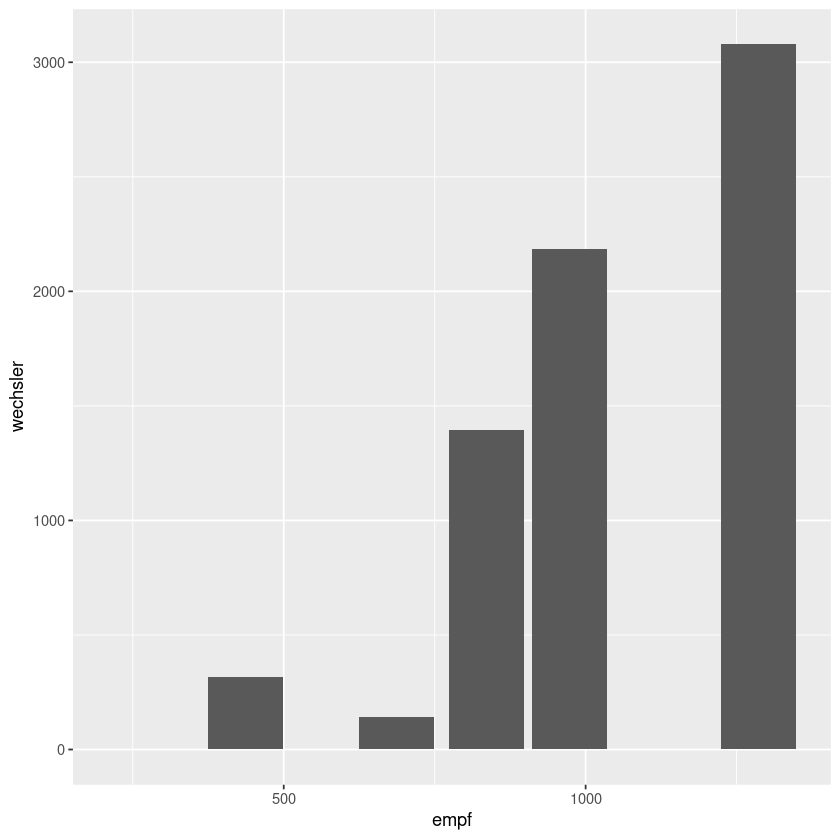

In [60]:
library(ggplot2)
df <- data.frame(
    kess = c(table1$kess),
    empf = c(empf),
    wechsler = c(wechsler)
    )
df

ggplot(df, aes(x=empf, y=wechsler)) +
  geom_bar(stat="identity")